In [240]:
from Codigo import *
import pandas as pd
import seaborn as sn
from pandas.plotting import scatter_matrix, lag_plot
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import warnings
sn.set(style="whitegrid")
warnings.filterwarnings('ignore')

In [241]:
pd.options.display.float_format = '{:,.4f}'.format

In [242]:
Datos = EleccionDatos('../../Alemania_Reducida.csv', 'consumo')

['Factor de conversión  de PPA, consumo del sector privado (UMN por $ a precios internacionales)', 'Ahorro ajustado: consumo de capital fijo (US$ actuales)', 'Gasto de consumo final (UMN a precios constantes)', 'Gasto de consumo final (US$ a precios actuales)', 'Gasto de consumo final de los hogares por crecimiento per cápita (% anual)', 'Gasto de consumo final de los hogares (US$ a precios constantes de 2010)', 'Gasto de consumo final del gobierno general (% del PIB)', 'Gasto de consumo final del gobierno general (UMN a precios actuales)', 'Gasto de consumo final de los hogares per cápita (US$ a precios constantes de 2010)', 'Gasto de consumo final del gobierno general (UMN a precios constantes)', 'Gasto de consumo final del gobierno general (US$ a precios actuales)', 'Gasto de consumo final (US$ a precios constantes de 2010)', 'Gasto de consumo final de los hogares, PPA ( $ a precios internacionales constantes de 2011)', 'Gasto de consumo final de los hogares (UMN a precios constante

In [243]:
dt = Datos[['PIB (US$ a precios constantes de 2010)','Gasto de consumo final de los hogares (US$ a precios constantes de 2010)','Gasto nacional bruto (US$ a precios constantes de 2010)']].dropna(axis = 0)
dt.info()
dt.columns = ['PIB','Inversión','Gasto']
dt = dt.reset_index()
dt['fecha'] = dt['2']
dt.drop('2', axis = 1, inplace= True)
dt['fecha'] = pd.to_datetime(dt['fecha'], format='%Y')
dt['fecha'] = dt['fecha'] + pd.DateOffset(days = 364)
dt.set_index('fecha', inplace= True)

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 1970 to 2022
Data columns (total 3 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   PIB (US$ a precios constantes de 2010)                                    53 non-null     float64
 1   Gasto de consumo final de los hogares (US$ a precios constantes de 2010)  53 non-null     float64
 2   Gasto nacional bruto (US$ a precios constantes de 2010)                   53 non-null     float64
dtypes: float64(3)
memory usage: 1.7 KB


In [244]:
for i in dt.columns:
    dt[i] = np.log(dt[i])


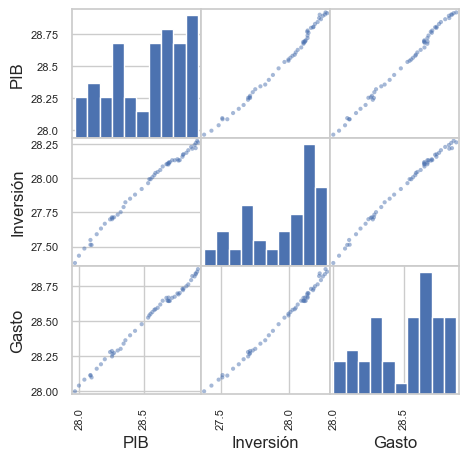

In [245]:
scatter_matrix(dt, figsize=(5,5))
plt.show()

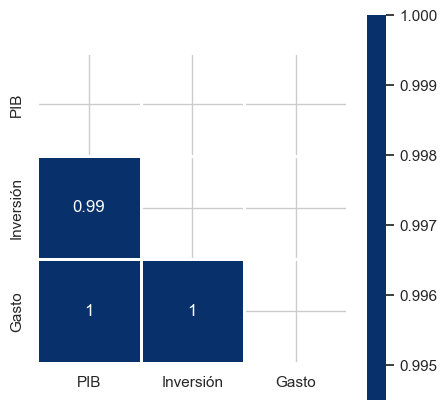

In [246]:
corr = dt.corr()
mask = np.triu(np.ones_like(corr, dtype= bool))
f, ax = plt.subplots(figsize = (5,5))
sn.heatmap(corr, mask=mask, cmap ='Blues', vmax=1, center = 0, square= True, linewidths= 1, annot= True)
plt.show()

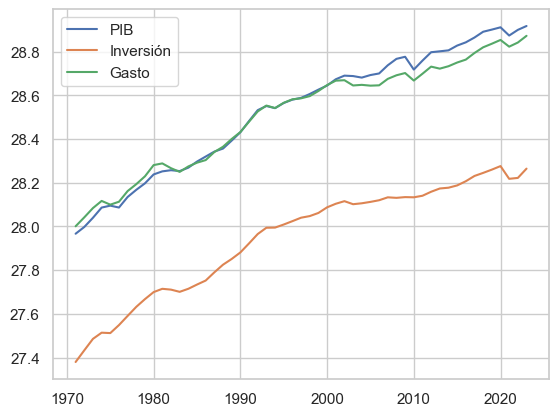

In [247]:

plt.plot(dt, label = dt.columns)
plt.legend()
plt.show()

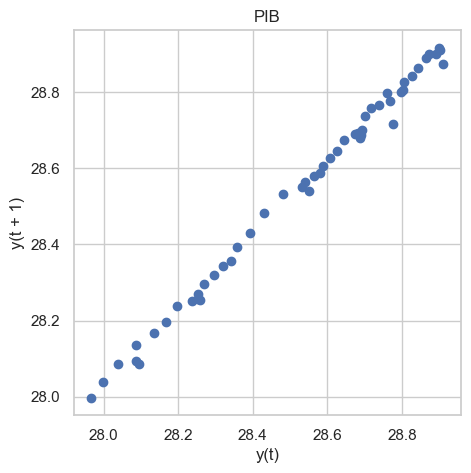

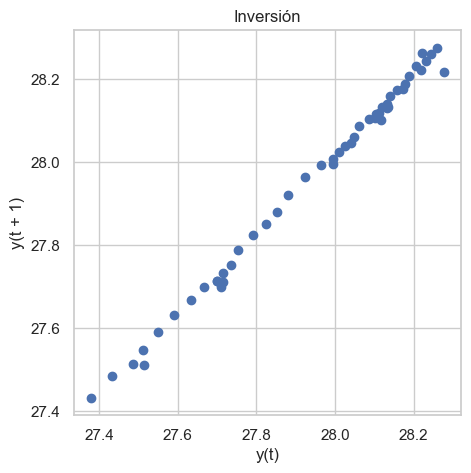

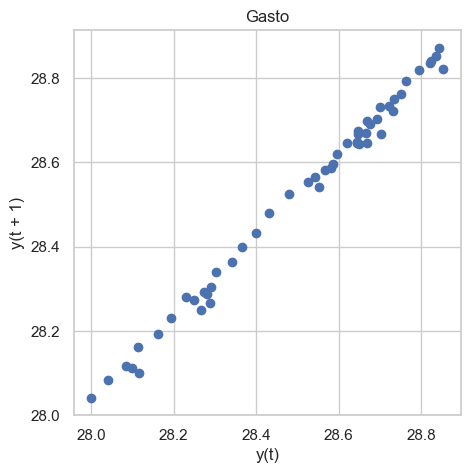

In [248]:

for i in dt.columns:
    plt.figure(figsize=(5,5))
    lag_plot(dt[i], lag = 1)
    plt.title(i)
    plt.show()

In [249]:
model = VAR(dt)
orden = model.select_order(maxlags=10)
optimal = orden.selected_orders
for i in optimal:
    print(f'{i}: {optimal[i]}')

aic: 10
bic: 1
hqic: 1
fpe: 1


In [250]:
result = model.fit(2)
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 04, Dec, 2023
Time:                     20:53:58
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -25.1568
Nobs:                     51.0000    HQIC:                  -25.6483
Log likelihood:           465.686    FPE:                5.38685e-12
AIC:                     -25.9523    Det(Omega_mle):     3.66237e-12
--------------------------------------------------------------------
Results for equation PIB
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.981375         0.705499            1.391           0.164
L1.PIB               0.483805         0.277546            1.743           0.081
L1.Inversión         0.099204         0.291683            0.340   

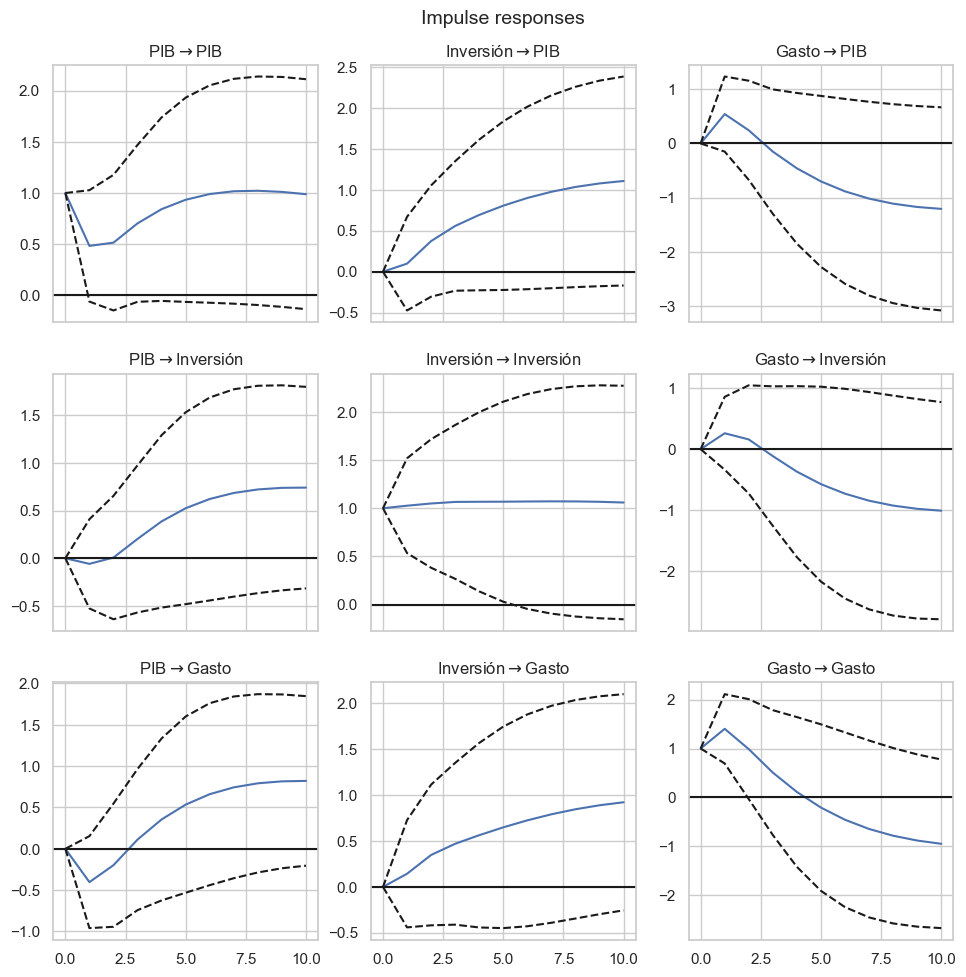

In [251]:
irf = result.irf()
irf.plot()
plt.show()

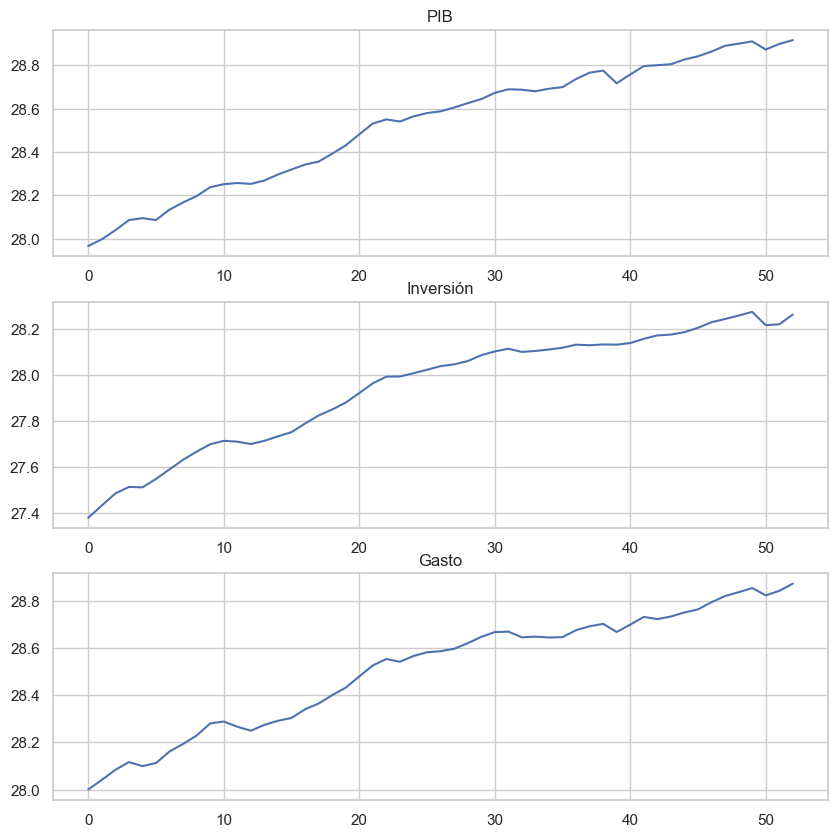

In [252]:
result.plot()
plt.show()

In [253]:
results2 = model.fit(maxlags=5, ic = 'aic')
lag_order = results2.k_ar
results2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 04, Dec, 2023
Time:                     20:53:59
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -25.6250
Nobs:                     52.0000    HQIC:                  -25.9026
Log likelihood:           468.603    FPE:                4.74294e-12
AIC:                     -26.0753    Det(Omega_mle):     3.79747e-12
--------------------------------------------------------------------
Results for equation PIB
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.511718         0.642128            0.797           0.426
L1.PIB               0.884522         0.138343            6.394           0.000
L1.Inversión         0.144385         0.136440            1.058   

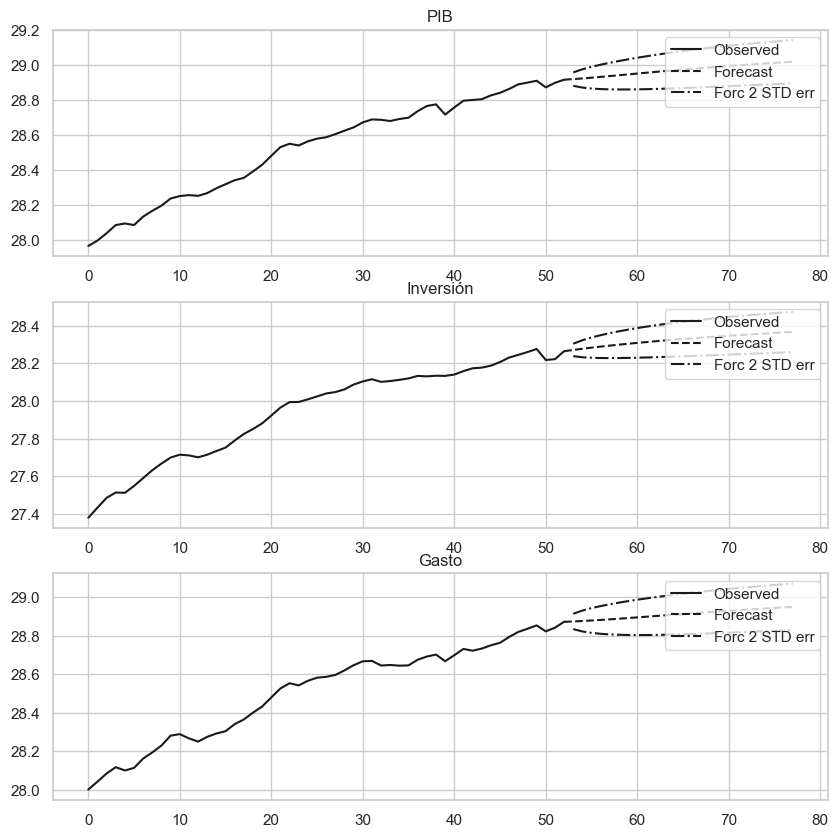

In [254]:
fig = results2.plot_forecast(25)
plt.show()

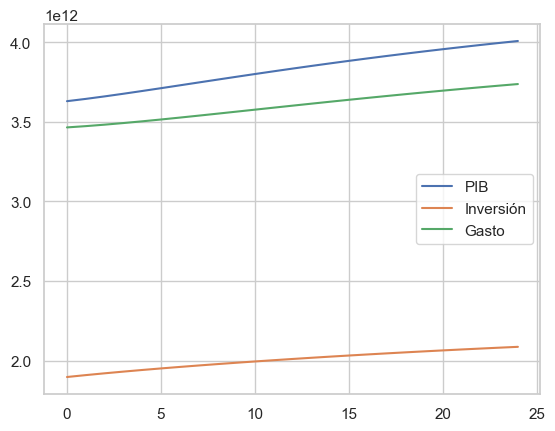

In [255]:
plt.plot(np.exp(results2.forecast(dt.values[-lag_order:],25)), label = dt.columns)
plt.legend()
plt.show()